# REAL ESTATE MARKET
## USA 2001-2020

### 1. Presentación

In [1]:
# Importamos todas las librerías que se necesitan.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot, grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu, pearsonr

In [2]:
# Creamos el dataframe de Real Estate y lo mostramos.
df_RE=pd.read_csv("../data/RealEstate_Sales_2001-2020.csv")
df_RE

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,1
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,1
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,0
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,1
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,1


In [3]:
# Antes de empezar, realizamos una copia de DF y lo guardamos como backup en un DF distinto.
df_RE_backup=df_RE.copy()

In [4]:
# Revisamos el DF comprobando los valores nulos (no hay) además de los tipos de cada variable.
df_RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


In [5]:
# Reasignamos la variable Date Recorded a datetime y ordenamos el DF.
df_RE["Date Recorded"]=pd.to_datetime(df_RE["Date Recorded"])
df_RE.sort_values(by="Date Recorded",inplace=True)

### 2. Revisión y limpieza

In [6]:
# Buscamos registros duplicados y vemos que no hay.
duplicados=df_RE.duplicated()
df_RE[duplicados]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold


#### Serial Number

In [7]:
# Esta variable debería ser un indicador único de transacción.

In [8]:
# El Serial Number debería ser un indicador único para cada transacción pero vemos que hay muchas repeticiones de algunos de ellos.
df_RE["Serial Number"].value_counts()

Serial Number
10010      172
10018      172
10002      172
10003      171
10029      171
          ... 
1500885      1
1500887      1
1500884      1
1500888      1
208123       1
Name: count, Length: 83537, dtype: int64

In [9]:
# Comprobamos cuantos indicadores repetidos hay y son muchos. Así que investigamos más.
df_RE.loc[df_RE["Serial Number"].duplicated()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
109930,10002,2001,2001-10-01,New Britain,195 MANSFIELD AVE,85260,137500.0,0.620073,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
96260,10001,2001,2001-10-01,Coventry,144 BUENA VISTA RD,55860,100000.0,0.558600,Nan,Nan,0
91590,10002,2001,2001-10-01,East Windsor,361 RYE ST,70570,150000.0,0.470467,Nan,Nan,0
86330,10005,2001,2001-10-01,Cheshire,81 MAYVIEW AVE,79470,150000.0,0.529800,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
59233,200354,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,200228,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,20712,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,20000043,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


In [10]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (ejemplo: 10003).
df_RE.loc[df_RE["Serial Number"]==10003]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
76429,10003,2001,2001-10-01,Avon,26 OAKENGATE LN,287990,455000.0,0.632945,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
122165,10003,2001,2001-10-01,North Haven,90 CULVER LN,118440,211000.0,0.561327,Nan,Nan,0
80091,10003,2001,2001-10-01,Brooklyn,250 HERRICK RD,73670,127900.0,0.575997,Nan,Nan,0
84005,10003,2001,2001-10-01,Burlington,24 DANIEL TRACE,326620,485000.0,0.673443,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
546107,10003,2010,2010-11-16,Eastford,ASHFORD RD,55200,40000.0,1.380000,Nan,Nan,0
582996,10003,2010,2010-11-16,Hampton,259 SO BIGELOW RD,302090,355000.0,0.850958,Single Family,Single Family,0
67439,10003,2010,2010-11-30,Hartland,PELL RD,80330,125900.0,0.638046,Nan,Nan,0
590703,10003,2010,2010-12-14,Chaplin,63 CHAPPELL ST,117900,150000.0,0.786000,Single Family,Single Family,0


In [11]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (ejemplo: 2000807).
df_RE.loc[df_RE["Serial Number"]==2000807]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
47544,2000807,2020,2021-01-15,Stamford,93 GLENBROOK ROAD #102,122160,72000000.0,0.0016,Residential,Condo,1
46420,2000807,2020,2021-09-30,Naugatuck,226 MAPLE ST,211660,370000.0,0.5720,Apartments,Nan,1


In [12]:
# Dado que la columna Serial Number no aporta la información esperada ni tiene ninguna otra utilidad, la eliminamos.
df_RE.drop("Serial Number",axis=1,inplace=True)

#### List Year

In [13]:
# La variable List Year hace referencia al año de publicación del inmueble para su venta.

In [14]:
# Revisamos los valores de la columna List Year y pertenecen al periodo a estudiar (2001-2020).
df_RE["List Year"].value_counts()

List Year
2004    84056
2020    66592
2003    64239
2005    61602
2002    59682
2001    59584
2019    58954
2018    50709
2016    49773
2014    49563
2006    48785
2015    46651
2017    45691
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

#### Date Recorded y Recorded Year

In [15]:
# La variable Date Recorded hace referencia a la fecha de venta del inmueble.

In [16]:
# A partir de la columna Date Recorded vamos a crear una nueva columna extrayendo solo el año de dicha fecha.
df_RE["Recorded Year"] = df_RE["Date Recorded"].dt.year
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18,1999
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16,2001
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16,2001
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5,2001
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5,2001
...,...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1,2021
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1,2021
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1,2021
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1,2021


In [17]:
# Analizando los valores de la nueva columna vemos que hay años anteriores y posteriores al periodo a analizar (2001-2020).
# El año 2001 se registra una cantidad extrañamente inferior a los años siguientes por lo que se prescinde también de los registros de ese año.
# Además hay un registro de 1999 cuando los de la columna List Year empiezan posteriormente. Resulta extraño y lo analizaremos con Years until sold.
df_RE["Recorded Year"].value_counts()

Recorded Year
2005    79566
2004    73943
2020    62534
2002    60207
2006    57250
2003    56319
2019    52622
2015    48894
2017    48493
2021    48441
2016    47611
2018    47165
2007    46138
2014    41941
2010    39128
2013    37513
2009    36305
2008    34195
2012    32568
2011    32088
2001    14291
1999        1
Name: count, dtype: int64

In [18]:
# Eliminamos los registros de las transacciones realizadas anterior o posteriormente a 2002 y 2020.
df_RE.drop(df_RE[df_RE["Recorded Year"] == 1999].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2001].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2021].index, inplace=True)

#### Years until sold

In [19]:
# La variable Years until sold hace referencia a los años transcurridos entre publicación y la venta del inmueble (sólo tiene en cuenta el año).

In [20]:
# Nos centramos en la columna Years until sold y buscamos los registros cuya fecha de venta es anterior a la fecha de "publicación".
df_RE[df_RE["Years until sold"]<0]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
407732,2006,2003-07-17,Naugatuck,80 GORMAN ST,84200,158900.0,0.529893,Single Family,Single Family,-3,2003
388498,2006,2004-02-26,Sharon,DOUGLAS RD,3600,5020.0,0.717131,Nan,Nan,-2,2004
414000,2006,2004-06-05,Bristol,225 TYLER WAY,147320,329900.0,0.446560,Single Family,Single Family,-2,2004
443550,2006,2004-07-27,South Windsor,305 MILL POND DR,113580,210000.0,0.540857,Condo,Condo,-2,2004
419243,2006,2004-07-31,Newington,131 STAGE COACH LN,246120,420000.0,0.586000,Single Family,Single Family,-2,2004
443976,2006,2004-08-02,Stratford,125 WARNER HL RD 27,92750,179000.0,0.518156,Condo,Condo,-2,2004
451304,2006,2004-09-12,Stratford,243 WEBER AVENUE,420,287500.0,0.001461,Nan,Nan,-2,2004
424369,2006,2004-09-24,South Windsor,2606 MILL POND DR,123520,243900.0,0.506437,Condo,Condo,-2,2004
479961,2007,2004-11-02,Westport,6 SPRUCEWOOD LANE,869600,1200000.0,0.724667,Single Family,Single Family,-3,2004
478225,2007,2005-02-05,Meriden,46 ORIENT ST,155340,264000.0,0.588409,Two Family,Two Family,-2,2005


In [21]:
# Dado que no hay manera de saber la fecha correcta (siendo un dato importante para el estudio) y el peso de los registros no es significativo, decidimos borrar esos registros.
df_RE.drop(df_RE[df_RE["Years until sold"]<0].index,inplace=True)

In [22]:
# Comprobamos que entre la columna de List Year y la nueva columna Recorded Year no se da este error.
df_RE.loc[df_RE["List Year"]>df_RE["Recorded Year"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year


In [23]:
# Creamos una nueva columna con los años entre el List Year y el Recorded Year para comprobar si hay más incongruencias con la columna Years until sold.
df_RE["Years for sale"]=df_RE["Recorded Year"]-df_RE["List Year"]

In [24]:
# Ambas columnas son iguales por lo que eliminamos la nueva varibale creada.
df_RE[df_RE["Years for sale"]!=df_RE["Years until sold"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Years for sale


In [25]:
# Eliminamos la nueva columna creada.
df_RE.drop("Years for sale", axis=1, inplace=True)

#### Town

In [26]:
# La variable Town hace referencia a la población en la que está situado el inmueble.

In [27]:
# El DF no cuenta con los estados en los que está situado cada inmueble con lo que no los podemos mapear dado que muchos estados cuentas con poblaciones homónimas y estas a su vez con calles homónimas. Excel "uscities" no sirve.
# Por ello resulta imposible añadir esa información al DF si no viene dada de origen.

In [28]:
#Listamos todos los towns del dataset. Vemos que hay alguno/s con valor Unknown.
towns=df_RE["Town"].unique()
towns

array(['New Britain', 'Norwich', 'Roxbury', 'East Haven', 'Bristol',
       'Woodbury', 'Stratford', 'Newtown', 'Vernon', 'Hamden',
       'West Hartford', 'Westport', 'Windsor Locks', 'Watertown',
       'Stonington', 'Wethersfield', 'Torrington', 'Manchester',
       'West Haven', 'Milford', 'Plainville', 'Bridgeport', 'Rocky Hill',
       'East Granby', 'Southbury', 'Orange', 'Preston', 'Middletown',
       'Danbury', 'Avon', 'Ridgefield', 'Plainfield', 'Branford',
       'Farmington', 'East Windsor', 'Redding', 'Suffield', 'Newington',
       'Eastford', 'Berlin', 'Ansonia', 'Waterford', 'Hartford',
       'New London', 'Willington', 'Granby', 'Clinton', 'Hartland',
       'Wilton', 'Lyme', 'Bridgewater', 'East Hampton', 'Simsbury',
       'Litchfield', 'Chester', 'Stamford', 'Naugatuck', 'Burlington',
       'Killingly', 'Oxford', 'Cromwell', 'Glastonbury', 'Thompson',
       'Sterling', 'Bethlehem', 'Putnam', 'Norfolk', 'Madison', 'Windsor',
       'Ellington', 'Durham', 'Norwalk

In [29]:
# Buscamos los registros cuyo Town es desconocido y así podemos corregirlo (por los valores de town de la misma Address y lo podemos ver también en Internet).
df_RE.loc[df_RE["Town"]=="***Unknown***"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [30]:
#Vemos que con la misma dirección hay tres registros que hacen referencia a la misma transacción ya que tienen la misma fecha de compra y corresponden a una casa individual.
df_RE.loc[df_RE["Address"]=="18 MATHIEU LANE"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
479214,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,50000.0,1.330800,Nan,Nan,0,2007
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007
444846,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [31]:
# Al no poder determinar cual es la correcta, las eliminamos.
df_RE.drop(df_RE[df_RE["Address"] == "18 MATHIEU LANE"].index, inplace=True)

#### Address

In [32]:
# La variable Address hace referencia a la dirección del inmueble.
# La analizaremos más tarde junto con otras variables para detectar duplicados.

#### Sale Amount 

In [33]:
# La variable Sale Amount hace referencia al importe por el que se vende el inmueble.

In [34]:
# Cambiamos el nombre de la columna Sale Amount a Price
df_RE.rename(columns={"Sale Amount":"Price"},inplace=True)

In [35]:
# El precio medio es de 380.003$ pero la variable presenta una desviación estándar muy alta lo que indica una gran dispersión de los datos. 
# El precio mínimo es 0$.
# El precio máximo es de 395.500.000$ muy alejado de el 75% más caro que se sitúa en 360.000$ (por debajo de la media).
# Estos valores anómales distorsionan la media significativamente.
df_RE["Price"].describe()

count    9.344280e+05
mean     3.800034e+05
std      1.820167e+06
min      0.000000e+00
25%      1.399000e+05
50%      2.249000e+05
75%      3.600000e+05
max      3.955000e+08
Name: Price, dtype: float64

In [36]:
# Mostramos los 20 registros con mayor precio de venta y vemos que:
# Los nueve registros de mayor precio presentan el mismo valor y algunos de ellos con unos Sales Ratio disparados (mucha diferencia entre precio y valoración).
# Además los nueve registros pertenecen a Stamford que no destaca por se una de las ciudades con mayor coste de vida.
# El décimo precio más alto pertenece a Waterbyry (tampoco destaca entre las ciudades más caras del país) y es más de un 40% más caro que el siguiente inmueble de la lista (vendido el mismo año).
df_RE.nlargest(20,"Price")

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
801957,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090,395500000.0,0.027381,Nan,Nan,0,2016
847108,2016,2016-12-06,Stamford,200 HENRY STREET # 1,10669060,395500000.0,0.026976,Nan,Nan,0,2016
844492,2016,2016-12-06,Stamford,200 HENRY STREET # 2,3200720,395500000.0,0.008093,Nan,Nan,0,2016
839109,2016,2016-12-06,Stamford,301-401 COMMONS PARK SOUTH # C,92447590,395500000.0,0.233749,Nan,Nan,0,2016
799639,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110,395500000.0,0.128496,Nan,Nan,0,2016
845330,2016,2016-12-06,Stamford,200 HENRY STREET # 5,3307410,395500000.0,0.008363,Nan,Nan,0,2016
835231,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510,395500000.0,0.141958,Nan,Nan,0,2016
847797,2016,2016-12-06,Stamford,110 TOWNE STREET,23290450,395500000.0,0.058889,Nan,Nan,0,2016
825219,2016,2016-12-06,Stamford,200 HENRY STREET # 4,10935790,395500000.0,0.027651,Nan,Nan,0,2016
993748,2019,2019-11-13,Waterbury,64 ROBBINS ST,142858700,230043624.0,0.621000,Nan,Nan,0,2019


In [37]:
# Mostramos los inmuebles en Henry Street, Stamford y parece que los precios tan elevados son erróneos ya que distan mucho de las transacciones registradas en la misma calle.
# Eliminamos los 5 registros.
df_RE.loc[(df_RE["Address"].str.contains("HENRY STREET"))&(df_RE["Town"]=="Stamford")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
498324,2008,2008-11-20,Stamford,189 HENRY STREET,356580,282000.0,1.264468,Single Family,Single Family,0,2008
512947,2008,2009-03-30,Stamford,199 HENRY STREET,334190,170000.0,1.965824,Single Family,Single Family,1,2009
499740,2008,2009-03-30,Stamford,199 HENRY STREET,334190,170000.0,1.965824,Single Family,Single Family,1,2009
594846,2011,2012-05-23,Stamford,213 HENRY STREET,488820,320000.0,1.527562,Three Family,Three Family,1,2012
784620,2015,2015-12-30,Stamford,207 HENRY STREET,297230,700000.0,0.424614,Four Family,Four Family,0,2015
795909,2015,2016-04-11,Stamford,67 HENRY STREET,862200,214000.0,4.028972,Nan,Nan,1,2016
801957,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090,395500000.0,0.027381,Nan,Nan,0,2016
847108,2016,2016-12-06,Stamford,200 HENRY STREET # 1,10669060,395500000.0,0.026976,Nan,Nan,0,2016
844492,2016,2016-12-06,Stamford,200 HENRY STREET # 2,3200720,395500000.0,0.008093,Nan,Nan,0,2016
845330,2016,2016-12-06,Stamford,200 HENRY STREET # 5,3307410,395500000.0,0.008363,Nan,Nan,0,2016


In [38]:
# Mostramos los inmuebles en Commons Park South y parece que el precio también es aquívoco ya que distan mucho de la otra transacción registrada en la misma calle.
# Eliminamos el registro.
df_RE.loc[df_RE["Address"].str.contains("COMMONS PARK SOUTH")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
839109,2016,2016-12-06,Stamford,301-401 COMMONS PARK SOUTH # C,92447590,395500000.0,0.233749,Nan,Nan,0,2016
987308,2019,2019-12-26,Stamford,201 COMMONS PARK SOUTH,63630020,90000000.0,0.707000,Nan,Nan,0,2019


In [39]:
# Mostramos los inmuebles en Towne Street, y aunque no hay registros en esa calle con otros precios, el Sales Ratio es muy elevado.
# Prescindimos de los 3 registros.
df_RE.loc[df_RE["Address"].str.contains("TOWNE STREET")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
799639,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110,395500000.0,0.128496,Nan,Nan,0,2016
835231,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510,395500000.0,0.141958,Nan,Nan,0,2016
847797,2016,2016-12-06,Stamford,110 TOWNE STREET,23290450,395500000.0,0.058889,Nan,Nan,0,2016


In [40]:
# El décimo máximo precio se da en Robbins Street 64, calle donde los precios van desde los 46.000 hasta los 333.522 a excepción de un bloque Robbins St 64-68 (maps: hospital) que se vendió en 2016 por casi 64.000.000.
# Por ello, eliminamos el registro.
df_RE.loc[df_RE["Address"].str.contains("ROBBINS ST")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
246958,2003,2004-06-03,Waterbury,155 ROBBINS ST,138250,333522.0,0.414515,Nan,Nan,1,2004
265822,2003,2004-08-12,Waterbury,93 ROBBINS ST,136150,260000.0,0.523654,Nan,Nan,1,2004
256175,2003,2004-08-16,Waterbury,221-223 ROBBINS ST,97650,192500.0,0.507273,Nan,Nan,1,2004
350685,2004,2004-10-19,Waterbury,225 ROBBINS ST,115850,250000.0,0.463400,Nan,Nan,0,2004
349366,2004,2004-10-29,Waterbury,219 ROBBINS ST,112560,230000.0,0.489391,Nan,Nan,0,2004
340342,2004,2005-04-04,Waterbury,27-29 ROBBINS ST,73290,155900.0,0.470109,Nan,Nan,1,2005
302603,2004,2005-04-29,Waterbury,229-231 ROBBINS ST,88900,165000.0,0.538788,Nan,Nan,1,2005
317263,2004,2005-08-09,Waterbury,328 ROBBINS ST,79870,266100.0,0.300150,Nan,Nan,1,2005
388829,2005,2005-11-29,Waterbury,229 ROBBINS ST,88900,247000.0,0.359919,Nan,Nan,0,2005
399956,2005,2006-04-17,Waterbury,27 ROBBINS ST,79520,247000.0,0.321943,Nan,Nan,1,2006


In [41]:
df_RE.drop(df_RE.nlargest(10,"Price").index,inplace=True)

In [42]:
# Eliminamos los registros cuyo precio de venta sea 0$.
df_RE.drop(df_RE[df_RE["Price"]==0].index,inplace=True)

In [43]:
# Analizamos los registros cuyo precio es inferior a 300 y vemos que los datos no tienen sentido ya que su valoración es muy superior (importante la variable Sales Ratio) y el precio en sí ya parece extraño para cualquier tipo de inmueble. 
df_RE.loc[df_RE["Price"]<300]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
102652,2001,2002-01-24,Stamford,95 PROSPECT ST,221060,10.0,22106.000000,Nan,Nan,1,2002
164102,2002,2002-10-03,Portland,MAIN ST,0,100.0,0.000000,Nan,Nan,0,2002
131206,2002,2002-11-12,Hartford,57 GILLETT ST,165060,1.0,165060.000000,Nan,Nan,0,2002
194336,2003,2003-12-30,Brooklyn,HARTFORD RD,490,1.0,490.000000,Nan,Nan,0,2003
201022,2003,2003-12-30,East Hartford,40 HILLSIDE ST UT C 7,21100,105.0,200.952381,Nan,Nan,0,2003
...,...,...,...,...,...,...,...,...,...,...,...
422591,2006,2007-09-14,Guilford,1394 LITTLE MDW RD,198960,1.0,198960.000000,Single Family,Single Family,1,2007
887575,2017,2018-02-05,Plymouth,3 FAIRVIEW AVE EXT,103280,10.0,10328.000000,Single Family,Single Family,1,2018
881697,2017,2018-08-16,Suffield,BIRCH RD,700,100.0,7.000000,Nan,Nan,1,2018
893093,2018,2018-10-29,Beacon Falls,146 MUNSON ROAD,241910,1.0,241910.000000,Single Family,Single Family,0,2018


In [44]:
df_RE.drop(df_RE[df_RE["Price"]<300].index,inplace=True)

In [45]:
# Analizando los registros cuyo precio está entre los 300 y 1000$, la variable Sales Ratio cobra especial importancia así que su limpieza se hará con esa variable.
df_RE.loc[(df_RE["Price"]<1000)&(df_RE["Price"]>=300)]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
124782,2001,2002-04-02,Newington,WILLARD AVE,560,400.0,1.400000,Nan,Nan,1,2002
85899,2001,2002-08-01,Harwinton,VALE PASSWAY,270,300.0,0.900000,Nan,Nan,1,2002
80262,2001,2002-09-10,Berlin,WORTHINGTON RDG LT 21A,33740,500.0,67.480000,Nan,Nan,1,2002
142319,2002,2002-10-08,Chaplin,N BEDLAM RD,4000,680.0,5.882353,Nan,Nan,0,2002
130010,2002,2002-11-26,Bethlehem,32 KASSON AVE,48910,750.0,65.213333,Nan,Nan,0,2002
843,2002,2003-04-17,Oxford,OLD GOOD HL RD,57200,500.0,114.400000,Nan,Nan,1,2003
161792,2002,2003-05-16,Mansfield,KNOWLTON HL RD,420,975.0,0.430769,Nan,Nan,1,2003
156868,2002,2003-08-11,Oxford,MAPLE TREE HL RD,530,530.0,1.000000,Nan,Nan,1,2003
223115,2003,2004-01-21,New Milford,8 ELIZABETH LN,169470,700.0,242.100000,Nan,Nan,1,2004
206292,2003,2004-02-26,East Hampton,73 TARRAGON DR,24790,500.0,49.580000,Nan,Nan,1,2004


#### Assessed Value

In [46]:
# La variable Assessed Value hace referencia al importe de tasación del inmueble.

In [47]:
# Las valoraciones son variables enteras a diferencia de el precio de venta.
df_RE["Assessed Value"].dtype

dtype('int64')

In [48]:
# El valor mínimo de Assessed Value es 0 por lo que se decide eliminar dichos registros ya que dicha información es importante para el estudio y puede resultar errónea.
df_RE["Assessed Value"].describe()

count    9.327640e+05
mean     2.782642e+05
std      1.664332e+06
min      0.000000e+00
25%      8.776000e+04
50%      1.386000e+05
75%      2.255000e+05
max      8.815100e+08
Name: Assessed Value, dtype: float64

In [49]:
df_RE[df_RE["Assessed Value"]==0]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
100373,2001,2002-01-02,Stratford,4 CANAAN CT U15,0,38500.0,0.0,Nan,Nan,1,2002
118140,2001,2002-01-02,Thompson,LAKEVIEW ST,0,5000.0,0.0,Nan,Nan,1,2002
98572,2001,2002-01-07,Windsor Locks,12 GLENBROOK DR,0,168825.0,0.0,Nan,Nan,1,2002
112013,2001,2002-01-07,Sterling,1255 PLAINFIELD PIKE,0,12000.0,0.0,Nan,Nan,1,2002
81743,2001,2002-01-08,Eastford,COUNTY RD,0,32500.0,0.0,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
7027,2020,2020-12-23,Greenwich,125 FIELD POINT ROAD B6,0,3750000.0,0.0,Residential,Condo,0,2020
55567,2020,2020-12-29,Stratford,84 CANAAN STREET APT 25,0,28500.0,0.0,Apartments,Nan,0,2020
22235,2020,2020-12-30,Greenwich,125 FIELD POINT ROAD B4,0,3150000.0,0.0,Residential,Condo,0,2020
9266,2020,2020-12-31,Greenwich,0 LAFRENTZ ROAD,0,1700000.0,0.0,Vacant Land,Nan,0,2020


In [50]:
df_RE.drop(df_RE[df_RE["Assessed Value"]==0].index, inplace=True)

In [51]:
# Mostramos los inmuebles con tasación por debajo de 300$ y vemos que su precio no es acorde. Esperamos a ver la variable Sales Ratio para decidir qué hacer.
df_RE.loc[(df_RE["Assessed Value"]<300)]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
82542,2001,2002-01-02,Eastford,WEEKS RD,200,29500.0,0.006780,Nan,Nan,1,2002
92543,2001,2002-01-03,Killingly,195 CRANBERRY BOG RD,200,20000.0,0.010000,Nan,Nan,1,2002
69430,2001,2002-01-17,Bozrah,BOZRAH ST,70,1500.0,0.046667,Nan,Nan,1,2002
94,2001,2002-02-21,East Windsor,EAST RD,43,2000.0,0.021500,Nan,Nan,1,2002
105348,2001,2002-02-22,Southbury,296 PETER RD,110,2000.0,0.055000,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
5116,2020,2020-11-25,Burlington,52 SAW MILL ROAD,240,460225.0,0.000521,Residential,Single Family,0,2020
31298,2020,2020-12-16,Naugatuck,0 WEDGEWOOD DR,20,2500.0,0.008000,Vacant Land,Nan,0,2020
64922,2020,2020-12-23,Torrington,STILLWATER POND RD,130,33705.0,0.003857,Vacant Land,Nan,0,2020
60493,2020,2020-12-23,Torrington,STILLWATER POND RD,100,32935.0,0.003036,Vacant Land,Nan,0,2020


In [52]:
# Revisamos que hay algunas transacciones cuya valoración es superior al precio de venta.
df_RE.loc[df_RE["Assessed Value"]>df_RE["Price"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
101765,2001,2002-01-02,Newtown,38 GRAND PL,165290,59342.0,2.785380,Nan,Nan,1,2002
124384,2001,2002-01-02,Torrington,606 PROSPECT ST,41100,32000.0,1.284375,Nan,Nan,1,2002
101918,2001,2002-01-02,New Britain,2189 CORBIN AVE,79880,63000.0,1.267937,Nan,Nan,1,2002
97007,2001,2002-01-02,Orange,149 PORTER LN,154600,129500.0,1.193822,Nan,Nan,1,2002
124536,2001,2002-01-02,Preston,76 BENJAMIN RD,23300,10000.0,2.330000,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
23745,2020,2020-12-31,Hampton,67 PARKER RD,129530,75000.0,1.727000,Residential,Single Family,0,2020
46473,2020,2020-12-31,Milford,19 LIBERTY ST,124400,112000.0,1.110714,Residential,Single Family,0,2020
16967,2020,2020-12-31,Greenwich,50 LAFRENTZ ROAD,4335100,2700000.0,1.605500,Residential,Single Family,0,2020
38773,2020,2020-12-31,New London,45 SPRING ST,90160,53000.0,1.701100,Residential,Single Family,0,2020


In [53]:
# Creamos una nueva variable categórica, Overpriced" que indica si el precio es superior a la valoración, inferior o igual.
df_RE["Overpriced"] = ["Yes" if assess < price else "Equal" if assess==price else "No" for assess, price in zip(df_RE["Assessed Value"], df_RE["Price"])]

In [54]:
# La categoría Equal representa un 0,064% por lo que se decide agrupar con la categoría "No". 
df_RE["Overpriced"].value_counts(normalize=True)

Overpriced
Yes      0.862449
No       0.136917
Equal    0.000635
Name: proportion, dtype: float64

In [55]:
# Modificamos la nueva variable, Overpriced" que indica si el precio es superior a la valoración. Variable binaria.
df_RE["Overpriced"] = ["Yes" if assess < price else "No" for assess, price in zip(df_RE["Assessed Value"], df_RE["Price"])]

#### Sales Ratio

In [56]:
# La variable Sales Ratio hace referencia a: precio/tasación del inmueble.

In [57]:
# Nos determina el ratio entre el precio de venta y la valoración del inmueble, siendo 1 la misma cuantía.
df_RE["Sales Ratio"]=df_RE["Price"]/df_RE["Assessed Value"]

In [58]:
# La variable presenta una desviación estándar muy elevada ya que hay mucha dispersión de los datos.
df_RE["Sales Ratio"].describe()

count    9.263440e+05
mean     8.696003e+00
std      4.335928e+03
min      1.576527e-04
25%      1.255036e+00
50%      1.575342e+00
75%      2.027333e+00
max      4.150000e+06
Name: Sales Ratio, dtype: float64

In [61]:
# El número de inmuebles vendidos por debajo de la mitad de su valoración es parecida durante todo el periodo.
df_filtrado = df_RE.loc[df_RE["Sales Ratio"] < 0.5]
df_filtrado.groupby("Recorded Year")["Sales Ratio"].count()

Recorded Year
2002    2034
2003    1744
2004    1995
2005    2161
2006    1516
2007    1581
2008    1395
2009    2159
2010    2731
2011    2676
2012    2514
2013    2002
2014    2245
2015    2365
2016    1955
2017    1831
2018    1393
2019    1513
2020    1207
Name: Sales Ratio, dtype: int64

In [62]:
# Mostramos los registros con mayor Sales ratio y parece que el problema viene de la baja valoración (seguramente erróneamente registrada). No nos afecta significativamente así que decidimos mantener los registros.
df_RE.nlargest(10,"Sales Ratio")

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced
816649,2016,2017-03-31,Hamden,42 WARNER ST,1,4150000.0,4.150000e+06,Nan,Nan,1,2017,Yes
321685,2004,2005-09-08,Simsbury,1 WEST ST UT 207,1,308700.0,3.087000e+05,Nan,Nan,1,2005,Yes
379808,2005,2005-10-05,Farmington,87 BRADFORD WALK,2,369318.0,1.846590e+05,Nan,Nan,0,2005,Yes
166612,2002,2003-09-16,New Milford,PEET HL RD,10,1650000.0,1.650000e+05,Nan,Nan,1,2003,Yes
267595,2004,2005-07-13,North Haven,603 SKIFF ST,3,425000.0,1.416667e+05,Nan,Nan,1,2005,Yes
678302,2013,2014-09-04,Westbrook,5 PINE CONE DR,1,80830.0,8.083000e+04,Single Family,Single Family,1,2014,Yes
681182,2013,2014-08-25,Westbrook,9 OAK DR,1,41680.0,4.168000e+04,Single Family,Single Family,1,2014,Yes
170291,2002,2003-08-08,Meriden,56 HIDDEN VLY DR,10,265000.0,2.650000e+04,Nan,Nan,1,2003,Yes
223895,2003,2004-09-17,Meriden,158 MILLER AVE,10,239800.0,2.398000e+04,Nan,Nan,1,2004,Yes
223980,2003,2004-06-25,Meriden,139 CROWN ST EXT,10,232000.0,2.320000e+04,Nan,Nan,1,2004,Yes


#### Property Type y Residential Type

In [65]:
# Las variables Property Type y Residential Type hacen referencia a la tipología del inmueble.

In [66]:
# Analizando los valores de la tipología de viviendas vemos que hay margen de mejora en la categorización.
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Apartments      Nan                     78
Commercial      Nan                    450
Condo           Condo               104298
Four Family     Four Family           2149
Industrial      Nan                     54
Nan             Nan                 362120
Public Utility  Nan                      1
Residential     Single Family        12428
                Condo                 3107
                Two Family             787
                Three Family           370
                Four Family             60
Single Family   Single Family       400701
Three Family    Three Family         12584
Two Family      Two Family           26382
Vacant Land     Nan                    775
Name: count, dtype: int64

In [67]:
# Los apartamentos vamos a asignarlos a la tipología residencial.
df_RE.loc[df_RE["Property Type"]=="Apartments","Residential Type"]="Apartments"

In [68]:
# Las categorías residenciales de Two Family, Three Family, Four Family , Condos y Apartments son muy poco marginales así que las agrupamos.
df_RE.loc[df_RE["Residential Type"]=="Two Family","Residential Type"]="Others"
df_RE.loc[df_RE["Residential Type"]=="Three Family","Residential Type"]="Others"
df_RE.loc[df_RE["Residential Type"]=="Four Family","Residential Type"]="Others"
df_RE.loc[df_RE["Residential Type"]=="Condo","Residential Type"]="Others"
df_RE.loc[df_RE["Residential Type"]=="Apartments","Residential Type"]="Others"

In [69]:
# Categorizamos como propiedad residencial todos los que lo son.
df_RE.loc[df_RE["Residential Type"]=="Others","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Single Family","Property Type"]="Residential"

In [70]:
# Unificamos las tipologías de propiedad no residenciales.
df_RE.loc[df_RE["Property Type"]=="Vacant Land","Property Type"]="No Residential"
df_RE.loc[df_RE["Property Type"]=="Commercial","Property Type"]="No Residential"
df_RE.loc[df_RE["Property Type"]=="Industrial","Property Type"]="No Residential"
df_RE.loc[df_RE["Property Type"]=="Public Utility","Property Type"]="No Residential"

In [71]:
# Los inmuebles No Residential vamos a distinguirlos de los desconocidos dentro de la Residential Type.
df_RE.loc[df_RE["Property Type"]=="No Residential","Residential Type"]="No Residential"

In [72]:
# Comprobamos la categorización.
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Nan             Nan                 362120
No Residential  No Residential        1280
Residential     Single Family       413129
                Others              149815
Name: count, dtype: int64

In [73]:
# Mostramos una tabla de contingencia para ver la distribución entre tipo de propiedad y año de venta.
# Hasta el 2006 no se empiezan a categorizar los inmuebles vendidos (por lo que no podemos prescindir de los inmuebles sin categoría).
# En el 2020 aparecen categorizados por primera vez inmuebles no residenciales.
tabla_contingencia = pd.crosstab(df_RE['Residential Type'], df_RE['Recorded Year'])
tabla_contingencia

Recorded Year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Residential Type,,,,,,,,,,,,,,,,,,,
Nan,59395,55440,72719,77895,45336,5021,3364,2824,3386,3155,3124,3268,3813,3934,3909,3873,4055,4246,3363
No Residential,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1280
Others,0,0,0,0,3375,11622,8340,9519,10133,8014,7418,8453,10239,11524,11352,11273,10784,13384,14385
Single Family,0,0,0,0,7500,28874,22140,23801,25455,20763,21949,25706,27798,33324,32207,33245,32154,34852,43361


In [74]:
# Dado el poco peso de la categoría No residencial y Others en comparación con la vivienda unifamiliar, se unifican.
df_RE.loc[df_RE["Residential Type"]=="No Residential","Residential Type"]="Others"

In [75]:
# Así se elimina la variable Property Type y la columna Residential Type pasa a llamarse Property Type.
df_RE.drop("Property Type",axis=1,inplace=True)
df_RE.rename(columns={"Residential Type":"Type"},inplace=True)

In [76]:
# Esta situación nos lleva a pensar que en 2006 se empezaron a categorizar los inmuebles objeto de transacción pero que hasta el momento su categoría no venía informada. ¿Es un tema del DF o a nivel nacional no se tiene ese dato?
# Dada la falta de información en años previos al 2006 no podemos prescindir de ninguna categoría.

In [77]:
# Añadimos una columna que permita saber si la transacción as anterior a 2007 o no. Será una variable binaria.
df_RE["Before 2007"] = ["Yes" if year < 2007 else "No" for year in df_RE["Recorded Year"]]

#### Address

In [78]:
# La variable Address hace referencia a la dirección del inmueble.

In [79]:
# Buscamos registros con la misma fecha de venta + town + address + precio.
# Verificamos que son duplicados y nos quedamos solo con el primer registro.
duplicados_cuatro_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address", "Price"], keep="first")]
duplicados_cuatro_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Type,Years until sold,Recorded Year,Overpriced,Before 2007
113793,2001,2002-01-02,Orange,149 PORTER LN,154600,129500.0,0.837646,Nan,1,2002,No,Yes
102533,2001,2002-01-02,Newtown,19A GEORGES HL RD,190320,20000.0,0.105086,Nan,1,2002,No,Yes
111837,2001,2002-01-02,Newtown,19A GEORGES HL RD,190320,20000.0,0.105086,Nan,1,2002,No,Yes
94391,2001,2002-01-03,Guilford,385 THREE MILE CRSE,166460,342000.0,2.054548,Nan,1,2002,Yes,Yes
80559,2001,2002-01-03,Hartford,16 HUMPHREY ST,50960,60000.0,1.177394,Nan,1,2002,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
36496,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Single Family,0,2020,No,No
48665,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Single Family,0,2020,No,No
55997,2020,2020-12-28,Westbrook,310 GROVE BEACH RD N,317800,225000.0,0.707992,Others,0,2020,No,No
52184,2020,2020-12-30,Windsor Locks,2 JACKSON ST,112350,33000.0,0.293725,Single Family,0,2020,No,No


In [80]:
# Eliminamos los registros repetidos y nos quedamos sólo con el primero.
df_RE.drop(duplicados_cuatro_columnas.index, inplace=True)

In [81]:
# Buscamos registros con la misma fecha de venta + town + address.
# Son las mismas transacciones pero con distinto precio. Se eliminan.
duplicados_tres_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address"], keep=False)]
duplicados_tres_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Type,Years until sold,Recorded Year,Overpriced,Before 2007
112305,2001,2002-01-02,Plainville,STILLWELL DR,28980,20000.0,0.690131,Nan,1,2002,No,Yes
80798,2001,2002-01-02,Burlington,7 STANWICH LN,48650,100000.0,2.055498,Nan,1,2002,Yes,Yes
77776,2001,2002-01-02,Burlington,7 STANWICH LN,48650,7314.0,0.150339,Nan,1,2002,No,Yes
114709,2001,2002-01-02,Plainville,STILLWELL DR,26985,280000.0,10.376135,Nan,1,2002,Yes,Yes
104489,2001,2002-01-04,Watertown,106 AUGUSTA ST,85190,32874.0,0.385890,Nan,1,2002,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
13383,2020,2020-12-30,Bristol,41 BETHEL ST,111860,21667.0,0.193697,Single Family,0,2020,No,No
50030,2020,2020-12-30,New Haven,277 FORBES AV,117670,32500.0,0.276196,Others,0,2020,No,No
42812,2020,2020-12-30,New Haven,277 FORBES AV,117670,97500.0,0.828588,Others,0,2020,No,No
8089,2020,2020-12-30,Bristol,41 BETHEL ST,111860,108333.0,0.968470,Single Family,0,2020,No,No


In [82]:
# Eliminamos los registros repetidos.
df_RE.drop(duplicados_tres_columnas.index, inplace=True)

In [83]:
# Tras eliminar los registros duplicados, la cardinalidad de la dirección es de 74% lo que tiene sentido contando que el DF abarca 20 años.
df_RE["Address"].nunique()/len(df_RE)

0.7405212315361748

In [84]:
# La cantidad de registros resultantes de la limpieza son 905.893.
len(df_RE)

905893

### 3. Fusionado de tablas (tipo interés / inflación / desempleo)

In [85]:
# Creamos un DF con los datos de tipo de interés, inflación y tasa de desempleo para cada día comprendido entre 2002-2020.
df_Rates=pd.read_excel("../data/Rates_2001-2021.xlsx")
df_Rates

,Date,Interest Rate,Inflation,Unemployment
0,2001-01-01,0.065,0.028262,0.04730
1,2001-01-02,0.065,0.028262,0.04730
2,2001-01-03,0.060,0.028262,0.04730
3,2001-01-04,0.060,0.028262,0.04730
4,2001-01-05,0.060,0.028262,0.04730
...,...,...,...,...
7666,2021-12-28,0.000,0.046979,0.05350
7667,2021-12-29,0.000,0.046979,0.05350
7668,2021-12-30,0.000,0.046979,0.05350
7669,2021-12-31,0.000,0.046979,0.05350


In [86]:
# Fusionamos los DFs para obtener los datos de tipo de interés, inflación y desempleo para cada una de las fechas de registros.
df_total=pd.merge(df_RE,df_Rates,how="left", left_on="Date Recorded", right_on="Date")

In [87]:
# Mostramos el DF resultante y vemos que Date Recorded y Date están duplicados (obviamente).
df_total

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Type,Years until sold,Recorded Year,Overpriced,Before 2007,Date,Interest Rate,Inflation,Unemployment
0,2001,2002-01-01,New Britain,84 PIERREMOUNT AVE,60870,119900.0,1.969772,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
1,2001,2002-01-01,Norwich,348 BOSWELL AVE,61900,135000.0,2.180937,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
2,2001,2002-01-01,Roxbury,184 BACON RD,48660,126500.0,2.599671,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
3,2001,2002-01-01,East Haven,47 UNION AVE,62400,178000.0,2.852564,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
4,2001,2002-01-01,Bristol,52 SONSTROM RD,92440,140000.0,1.514496,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905888,2020,2020-12-31,Griswold,2 MECHANIC ST,27650,10000.0,0.361664,Others,0,2020,No,No,2020-12-31,0.0000,0.012336,0.0805
905889,2020,2020-12-31,Goshen,127 EAST HYERDALE DRIVE,337130,520000.0,1.542432,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805
905890,2020,2020-12-31,Wethersfield,33 TWO STONE DR,143180,150000.0,1.047632,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805
905891,2020,2020-12-31,Stonington,15 SHERWOOD DR,156600,226000.0,1.443167,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805


In [88]:
# Eliminamos Date.
df_total.drop("Date",axis=1,inplace=True)

In [89]:
# Ordenamos el DF.
orden_columnas=["Date Recorded","Recorded Year","List Year","Years until sold","Before 2007","Price","Assessed Value","Sales Ratio","Overpriced","Type","Address","Town","Interest Rate","Inflation","Unemployment"]
df_total=df_total[orden_columnas]
df_total

,Date Recorded,Recorded Year,List Year,Years until sold,Before 2007,Price,Assessed Value,Sales Ratio,Overpriced,Type,Address,Town,Interest Rate,Inflation,Unemployment
0,2002-01-01,2002,2001,1,Yes,119900.0,60870,1.969772,Yes,Nan,84 PIERREMOUNT AVE,New Britain,0.0175,0.015860,0.0578
1,2002-01-01,2002,2001,1,Yes,135000.0,61900,2.180937,Yes,Nan,348 BOSWELL AVE,Norwich,0.0175,0.015860,0.0578
2,2002-01-01,2002,2001,1,Yes,126500.0,48660,2.599671,Yes,Nan,184 BACON RD,Roxbury,0.0175,0.015860,0.0578
3,2002-01-01,2002,2001,1,Yes,178000.0,62400,2.852564,Yes,Nan,47 UNION AVE,East Haven,0.0175,0.015860,0.0578
4,2002-01-01,2002,2001,1,Yes,140000.0,92440,1.514496,Yes,Nan,52 SONSTROM RD,Bristol,0.0175,0.015860,0.0578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905888,2020-12-31,2020,2020,0,No,10000.0,27650,0.361664,No,Others,2 MECHANIC ST,Griswold,0.0000,0.012336,0.0805
905889,2020-12-31,2020,2020,0,No,520000.0,337130,1.542432,Yes,Single Family,127 EAST HYERDALE DRIVE,Goshen,0.0000,0.012336,0.0805
905890,2020-12-31,2020,2020,0,No,150000.0,143180,1.047632,Yes,Single Family,33 TWO STONE DR,Wethersfield,0.0000,0.012336,0.0805
905891,2020-12-31,2020,2020,0,No,226000.0,156600,1.443167,Yes,Single Family,15 SHERWOOD DR,Stonington,0.0000,0.012336,0.0805


In [90]:
# Creamos un cuadro resumen de las variables del estudio.

| Columna          | Descripción |
| ---------------- | ----------- |
| Date Redorded    | Fecha de venta |
| Redorded Year    | Año de venta |
| List Year        | Año de publicación |
| Years until sold | Años transcurridos entre publicación y venta |
| Before 2007      | Indica si la transacción se realiza antes del 2007  |
| Price            | Precio de venta |
| Assesssed value  | Valoración |
| Sales ratio      | Precio venta/Valoración |
| Overpriced       | Indica si el precio es superior a la valoración  |
| Type             | Tipo de propiedad |
| Town             | Población |
| Address          | Dirección |
| Interest Rate    | Interés marcado por la Reserva Federal |
| Inflation        | Inflación respecto al año anterior  |
| Unemployment     | Población en paro respecto a la población en edad de trabajar  |

In [91]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] > umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] > umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [92]:
card_tipo(df_total)

,Card,%_Card,Tipo,tipo_sugerido
Date Recorded,6057,0.668622,datetime64[ns],Numerica discreta
Recorded Year,19,0.002097,int32,Numerica discreta
List Year,20,0.002208,int64,Numerica discreta
Years until sold,5,0.000552,int64,Categorica
Before 2007,2,0.000221,object,Binaria
Price,51472,5.681907,float64,Numerica discreta
Assessed Value,87991,9.713178,int64,Numerica discreta
Sales Ratio,599986,66.231442,float64,Numerica continua
Overpriced,2,0.000221,object,Binaria
Type,3,0.000331,object,Categorica


In [93]:
binarias= ["Before 2007","Overpriced"]
categoricas = ["Type"]
temporal= ["Recorded Year","List Year"]
num_discretas = ["Assessed Value"]
num_continuas=["Price","Sales Ratio","Tipo de interés","Inflación","Desempleo"]

### 4. Análisis

#### Funciones

In [94]:
def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts()
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  

    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df

In [95]:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

#### Análisis univariante

##### Tipo de propiedad

In [96]:
# El 45% de las transacciones totales corresponden a inmuebles unifamiliares, alcanzando las 407.284 ventas.
# Es importante destacar que del 39% de las transacciones no se conoce el tipo de propiedad objeto de las mismas.
# El 16% restante pertenecen a otras tipologías de inmueble distintas a viviendas unifamiliares.

In [97]:
# Valores numéricos.
df_frecuencias = frecuencias(df_total, "Type")
df_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa
Type,,
Single Family,407284,44.959394
Nan,349461,38.576410
Others,149148,16.464196


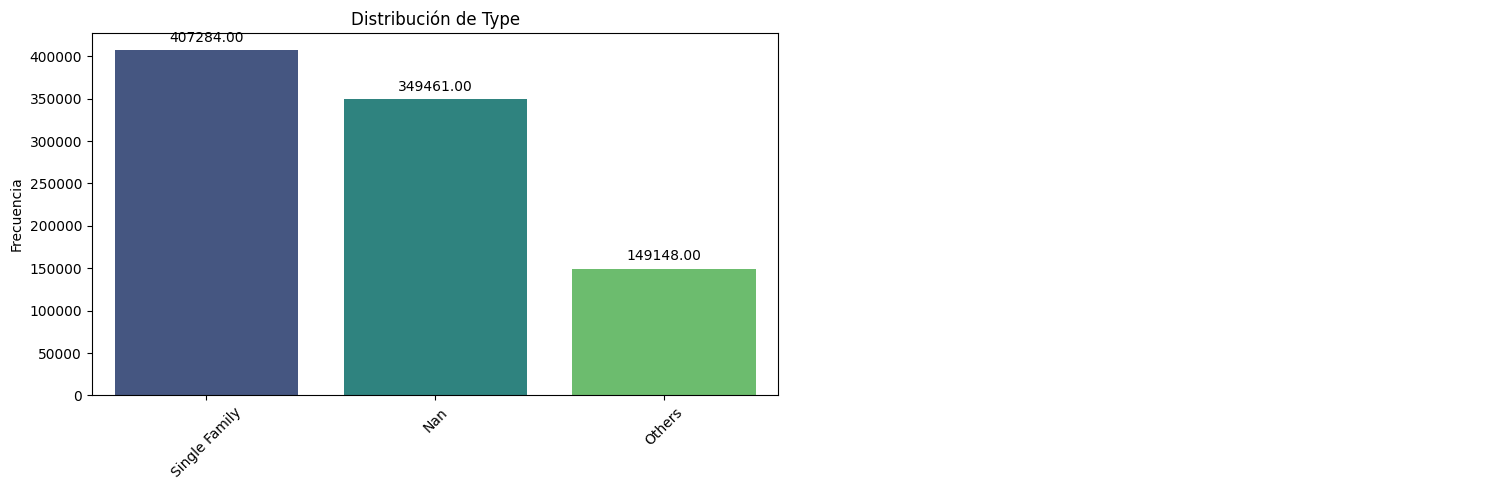

In [98]:
# Gráfico de barras: frecuencias absolutas.
pinta_distribucion_categoricas(df_total, ["Type"], mostrar_valores= True)

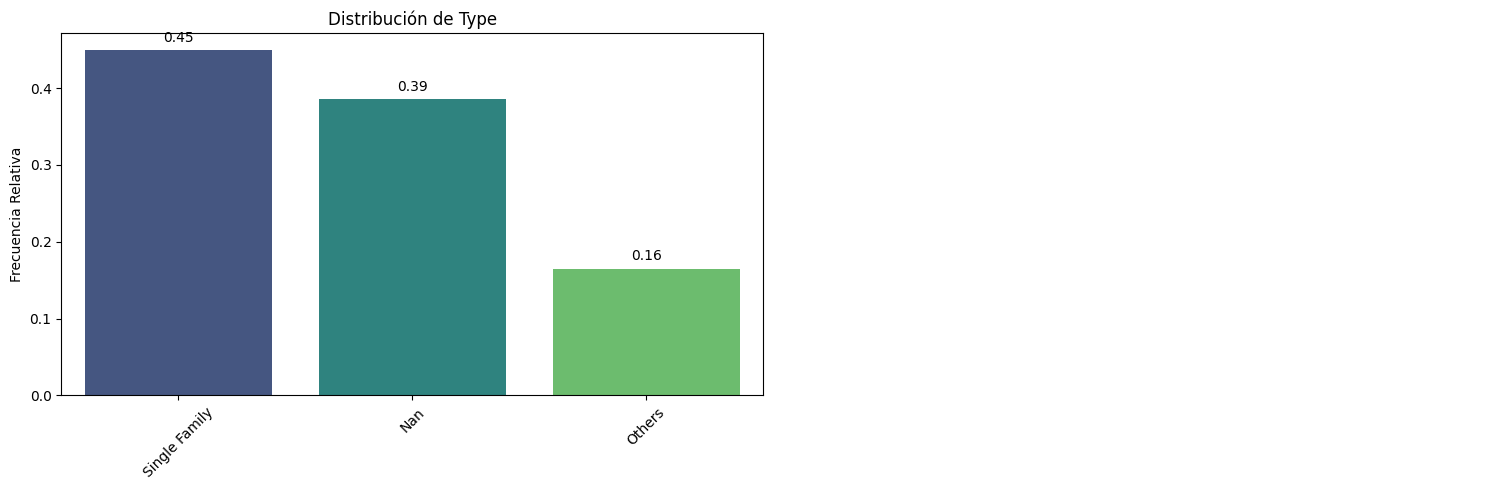

In [99]:
# Gráfico de barras: frecuencias relativas.
pinta_distribucion_categoricas(df_total, ["Type"], relativa= True, mostrar_valores= True)

##### Overpriced

In [100]:
# El 87% de las transacciones se materializaron con precios por encima de su valoración, 788.194 inmuebles.
# Mientras que solo el 13%, 117.699 transacciones, se materializan a inferior o igual precio que la valoración.

In [101]:
# Valores numéricos.
df_frecuencias = frecuencias(df_total, "Overpriced")
df_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa
Overpriced,,
Yes,788194,87.007406
No,117699,12.992594


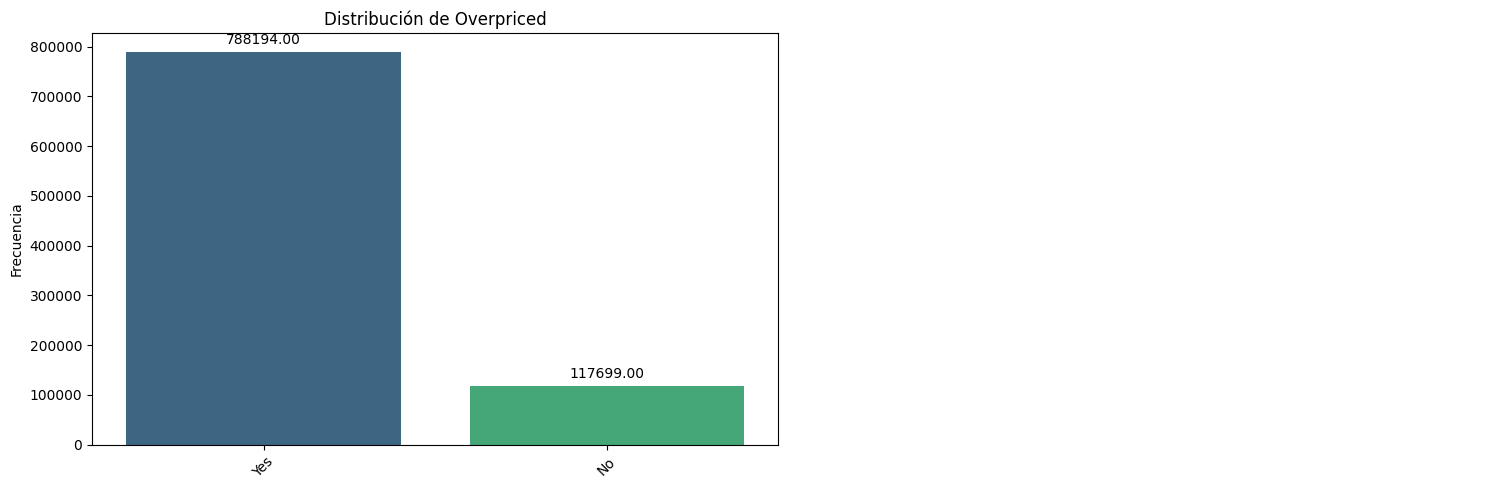

In [102]:
# Gráfico de barras: frecuencias absolutas.
pinta_distribucion_categoricas(df_total, ["Overpriced"], mostrar_valores= True)

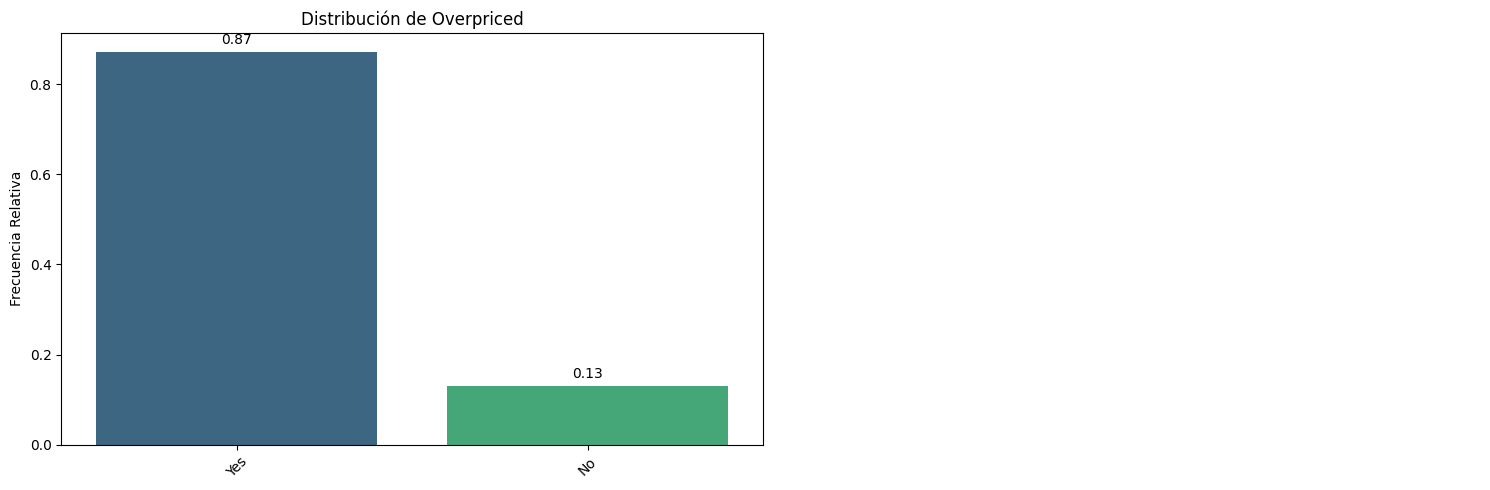

In [103]:
# Gráfico de barras: frecuencias relativas.
pinta_distribucion_categoricas(df_total, ["Overpriced"], relativa= True, mostrar_valores= True)

##### Before 2007

In [104]:
# 310.664 transacciones se realizaron entre el 2002 y el 2006 (34%), mientras que del 2007 hasta el 2020 se realizaron 595.229 (66%).
# El 34% de las transacciones tienen lugar el el 30% temporal (5/19 años) mientras que el 66% tiene lugar en el 70% temporal (14/19 años).

In [105]:
# Valores numéricos.
df_frecuencias = frecuencias(df_total, "Before 2007")
df_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa
Before 2007,,
No,595229,65.706325
Yes,310664,34.293675


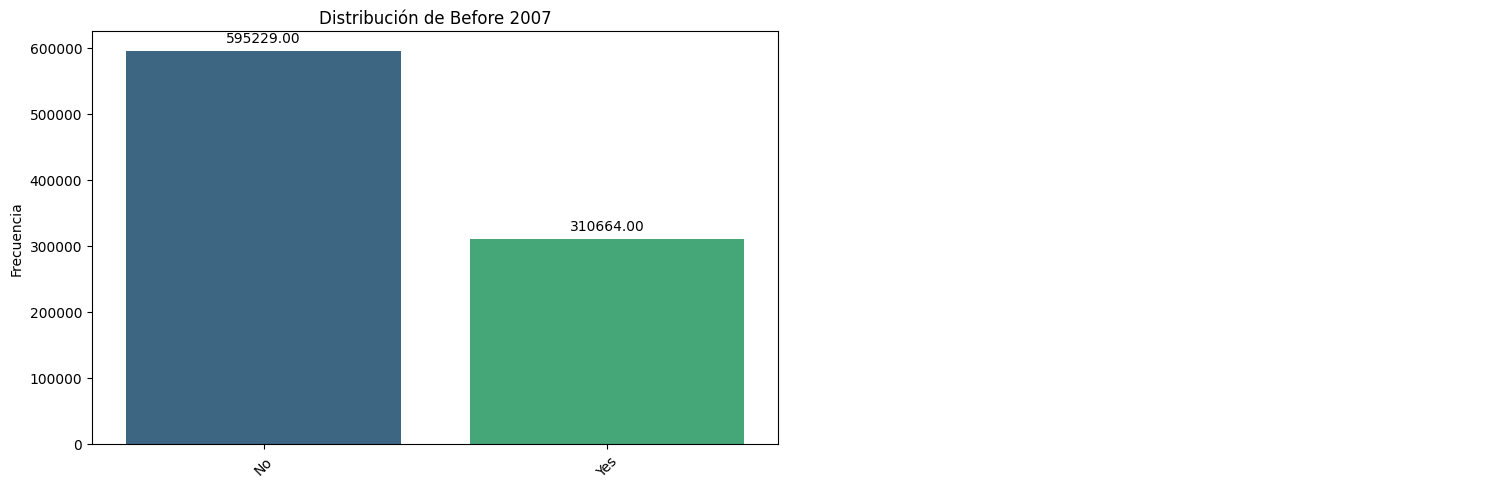

In [106]:
# Gráfico de barras: frecuencias absolutas.
pinta_distribucion_categoricas(df_total, ["Before 2007"], mostrar_valores= True)

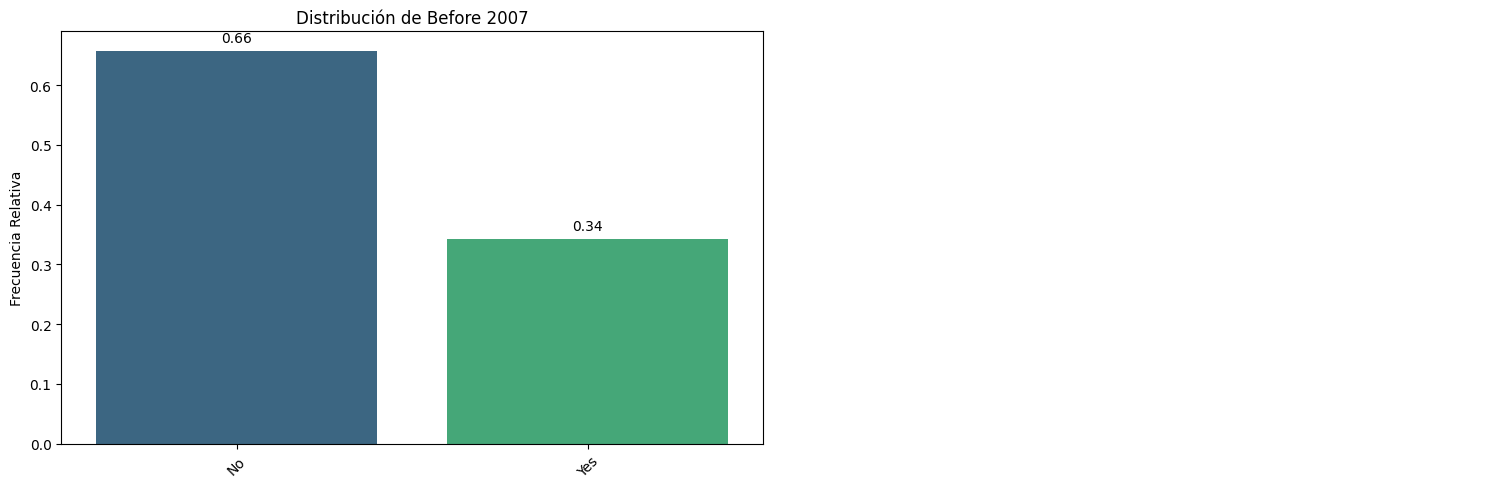

In [107]:
# Gráfico de barras: frecuencias relativas.
pinta_distribucion_categoricas(df_total, ["Before 2007"], relativa=True,mostrar_valores= True)

##### Price

In [108]:
# El precio medio se sitúa en 377.922$ mientras que la mediana se sitúa en 225.000$.
# La media se sitúa por encima del 75% de los registros (360.000$).
# Entre los 25% más caros se encuentran registros muy elevados (máximo: 163.000.000$) que arrastran la media. 

In [109]:
# Tendencia central y medidas de posición.
df_total["Price"].describe()

count    9.058930e+05
mean     3.779223e+05
std      1.297745e+06
min      3.000000e+02
25%      1.415000e+05
50%      2.250000e+05
75%      3.600000e+05
max      1.630000e+08
Name: Price, dtype: float64

(2,)


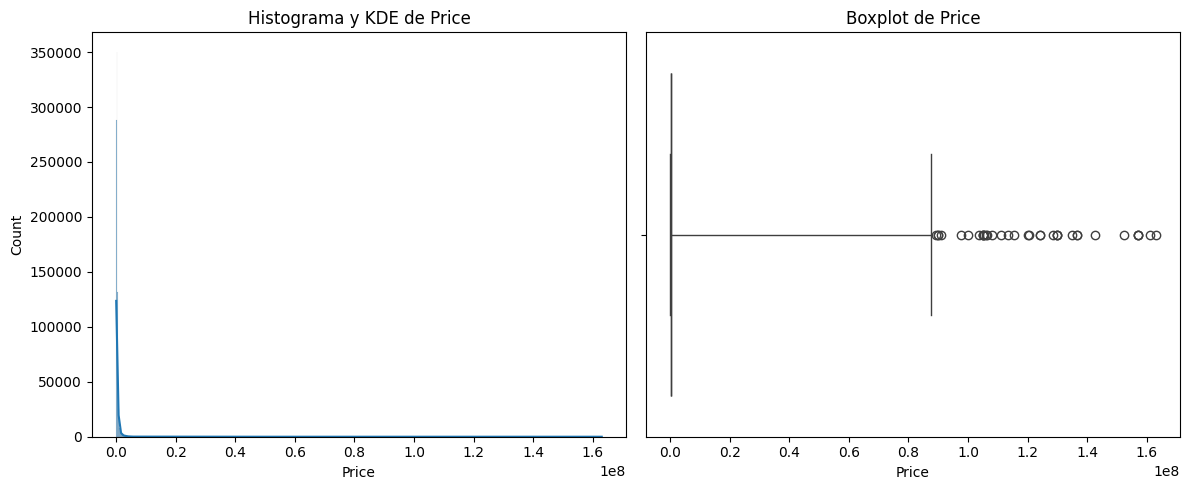

In [113]:
# Histograma y diagrama de cajas
plot_combined_graphs(df_total,["Price"],whisker_width=400, bins = 1000)

##### Interest Rate

In [114]:
# El tipo de interés medio durante 2002-2020 se sitúa en 1,44% mientras que la mediana se sitúa en 1%.
# Un 25% de las transacciones se produjeron a tipos de interés entre el 2% y el 5,25%, otro 25% se produjo cuando los tipos de interés eran nulos y el 50% restante se materializó situándose los tipos entre el 0% y el 2%.

In [115]:
# Tendencia central y medidas de posición.
df_total["Interest Rate"].describe()

count    905893.000000
mean          0.014435
std           0.016146
min           0.000000
25%           0.000000
50%           0.010000
75%           0.020000
max           0.052500
Name: Interest Rate, dtype: float64

(2,)


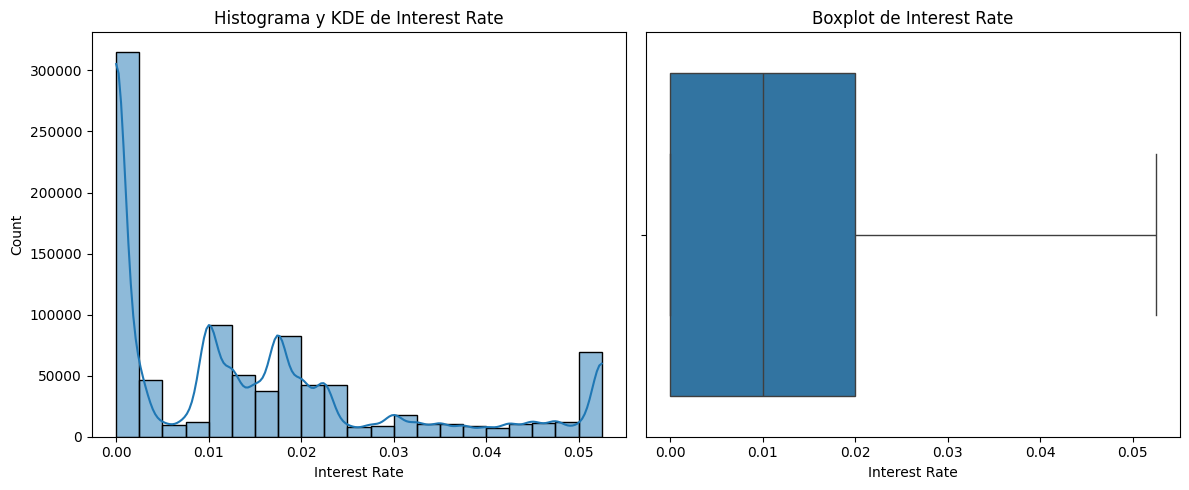

In [116]:
# Histograma y diagrama de cajas.
plot_combined_graphs(df_total, ["Interest Rate"], whisker_width=2, bins = 21)

##### Inflation

(2,)


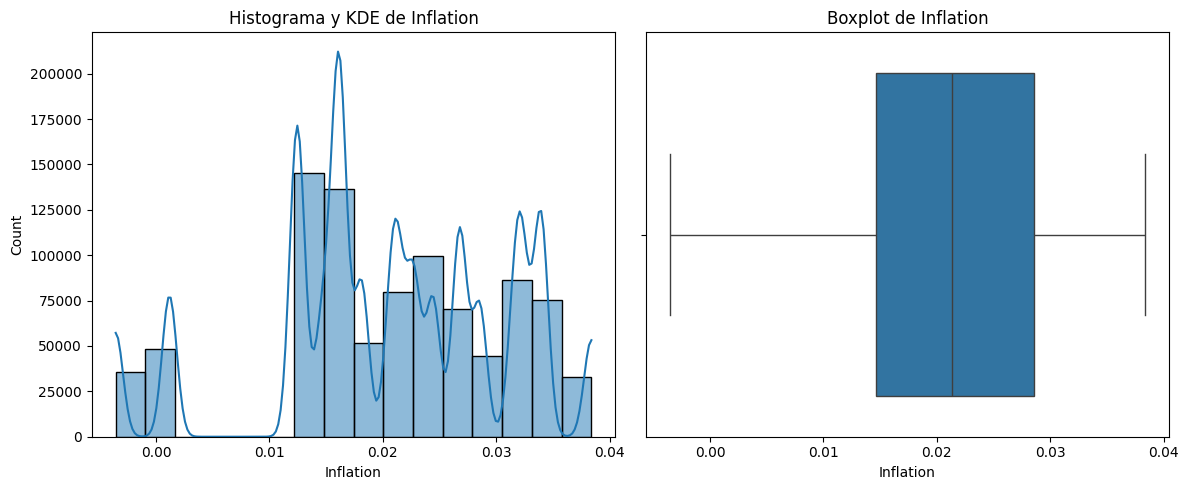

In [117]:
# Histograma y diagrama de cajas.
plot_combined_graphs(df_total, ["Inflation"], whisker_width=2, bins = 16)

##### Unemployment

(2,)


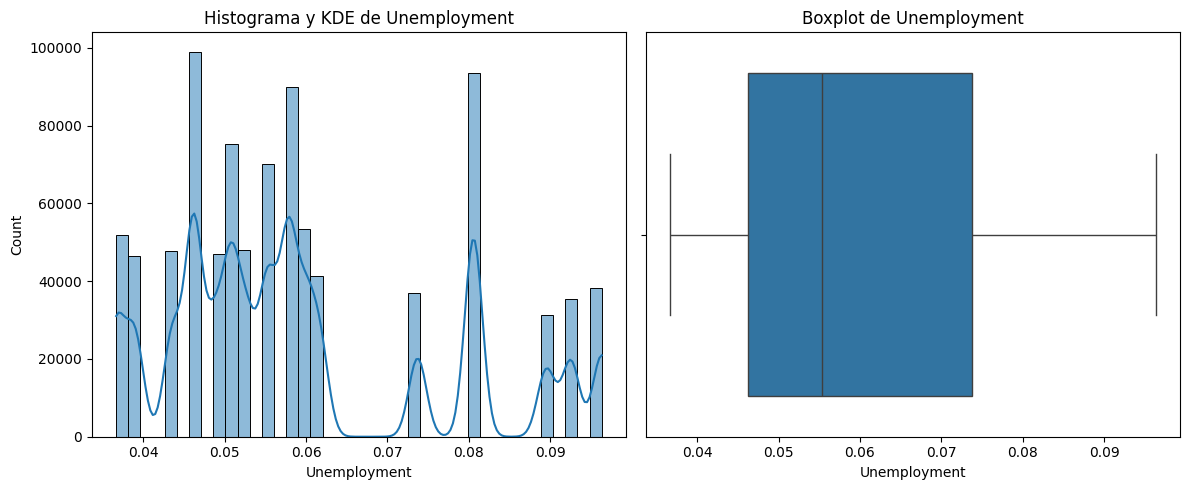

In [153]:
# Histograma y diagrama de cajas.
plot_combined_graphs(df_total, ["Unemployment"], whisker_width=2, bins = 40)

#### Análisis bivariante

##### Tipo de propiedad y Before 2007/Recorded Year

In [122]:
# Como ya se comenta en la sección de limpieza, hasta el año 2006 no se empiezan a categorizar los inmuebles.
# Por ende, la relación años (before 2007) y tipo de propiedad, es claramente dispar.
# Entre las transacciones realizadas antes del 2007 el 97% no fueron categorizadas (el otro 3% corresponde al 2006).
# A partir del 2007 el 67% fueron viviendas unifamiliares, el 24% otro tipo de inmuebles y el 8% no fueron catalogadas.

# Visto desde otra perspectiva, el 86% de las transacciones no categorizadas se produjeron antes del 2007.
# Mientras que el 98% de las viviendas unifamiliares y del resto de viviendas catalogadas, se vendieron a partir del 2007.

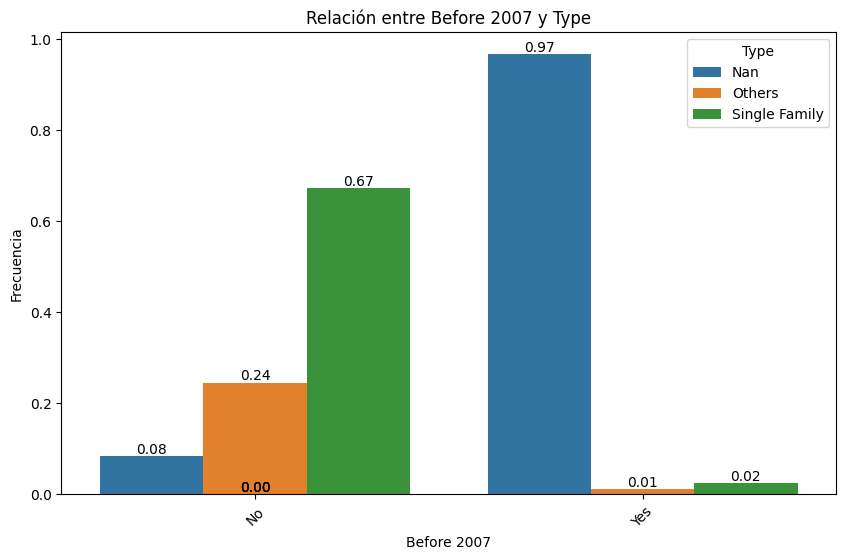

In [123]:
# Distribución relativa del tipo de propiedad según el periodo temporal.
plot_categorical_relationship_fin(df_total, "Before 2007","Type", show_values= True, relative_freq= True)

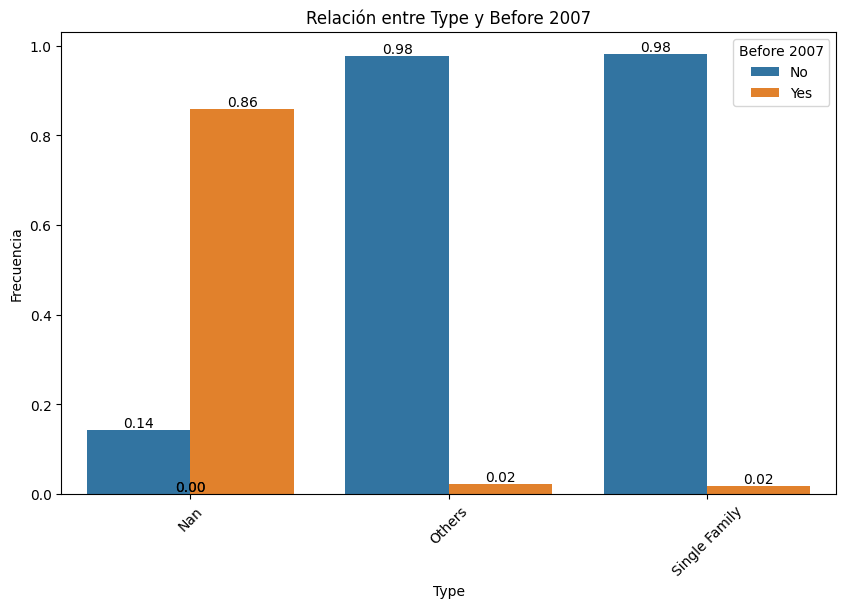

In [124]:
# Distribución relativa del periodo temporal según el tipo de propiedad.
plot_categorical_relationship_fin(df_total, "Type","Before 2007", show_values= True,relative_freq=True)

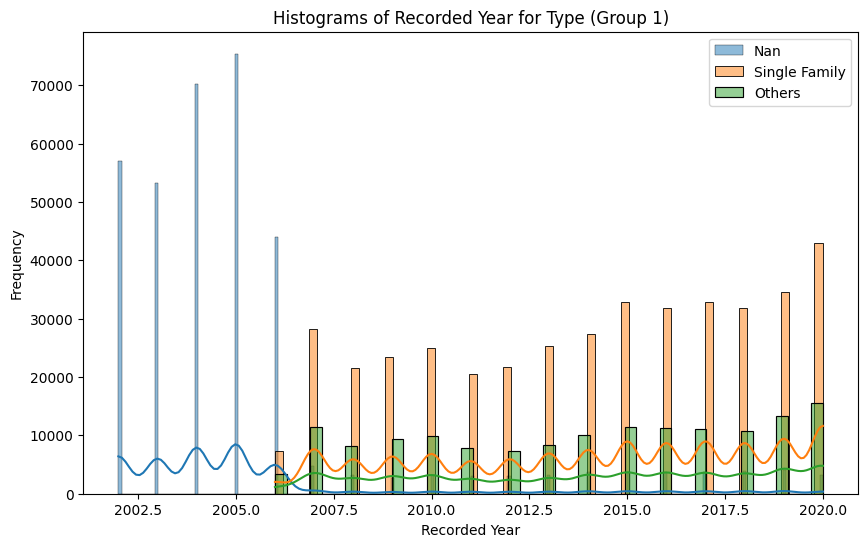

In [125]:
plot_grouped_histograms(df_total,"Type","Recorded Year", group_size= 3)

##### Overpriced y Before 2007/Recorded Year

In [126]:
# De las transacciones previas a 2007, el 95% se han pagado por encima de su valoración.
# Ese porcentaje cae al 83% entre las transacciones realizadas entre 2007 y 2020.
# Situándose la media global en el 87%, resulta significativa la diferencia (+8pp antes del 2007 vs. -4pp a partir del 2007).
# Entre 2009 y 02017 es cuando se da un mayor número de transacciones no sobrepagadas. 

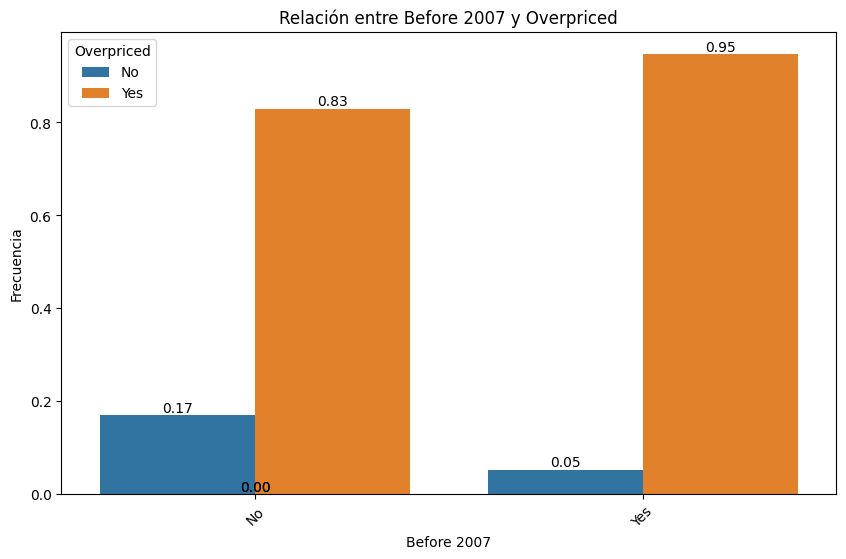

In [127]:
# Distribución relativa del sobreprecio según el periodo temporal.
plot_categorical_relationship_fin(df_total, "Before 2007","Overpriced", show_values= True, relative_freq= True)

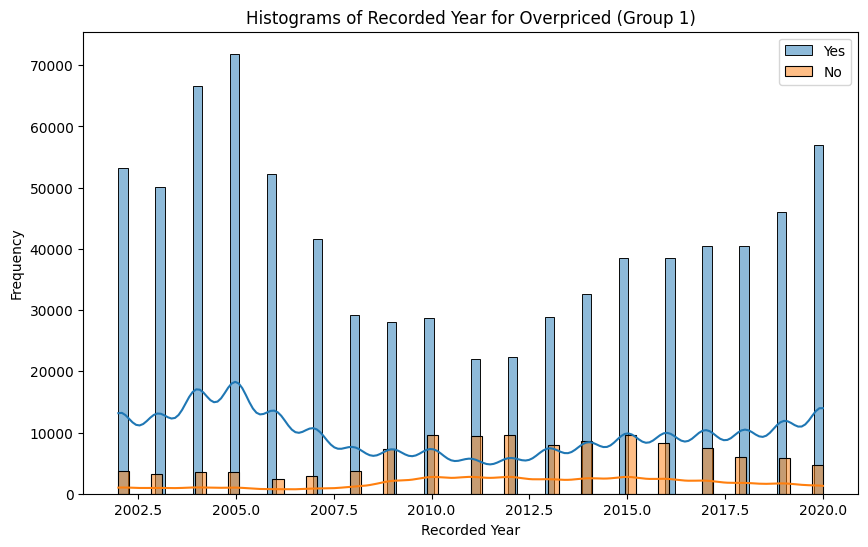

In [128]:
# Distribución relativa del sobreprecio según el periodo temporal.
plot_grouped_histograms(df_total,"Overpriced","Recorded Year", group_size= 2)

##### Tipo de propiedad y Overpriced

In [129]:
# El 91% de las transacciones sin catalogar se pagaron por encima de valor.
# Importante destacar que el 86% de esos inmuebles se concentran antes del 2007, periodo en el que el sobreprecio se sitúa en el 95% (+8pp que la media global, 87%).

# El 86% de las viviendas unifamiliares se han pagado por encima de su valoración (vs. el 83% de media del periodo post 2006 en el que se registran el 98% de dichos inmuebles).

# Del resto de inmuebles, el 83% se sobre-pagó (en línea con la media del periodo post 2006 en el que se registran el 98% de dichos inmuebles).

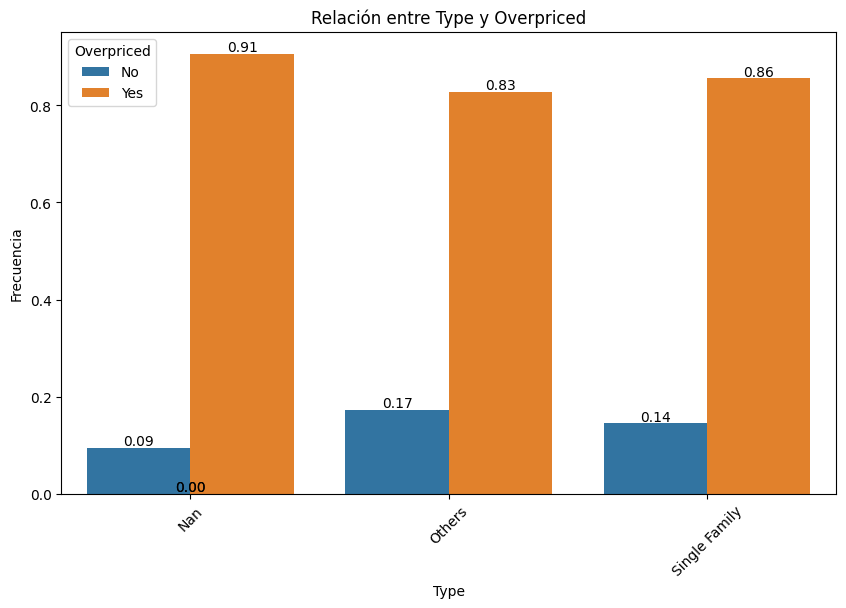

In [130]:
# Distribución relativa del sobreprecio según el tipo de inmueble.
plot_categorical_relationship_fin(df_total, "Type","Overpriced", show_values= True, relative_freq= True)

##### Price y Before 2007/Recorded Year

In [ ]:
# Los precios previos a 2007 se sitúan ligeramente por debajo a los del periodo posterior. Importante tener en cuenta el efecto de la inflación.
# Incremento de los precios del 2002 al 2007.
# Caída de los precios a partir del 2008 y tendencia mantenida hasta 2011.
# A partir de 2012 se contempla una paulatina remontada de los precios.

In [110]:
# Se crean dos DF por separado para ver los valores centrales.
df_before2007=df_total.loc[df_total["Before 2007"]=="Yes"]
df_after2006=df_total.loc[df_total["Before 2007"]=="No"]

In [151]:
df_before2007["Price"].describe()

count    3.106640e+05
mean     3.389532e+05
std      8.972983e+05
min      3.000000e+02
25%      1.400000e+05
50%      2.200000e+05
75%      3.500000e+05
max      1.036312e+08
Name: Price, dtype: float64

In [152]:
df_after2006["Price"].describe()

count    5.952290e+05
mean     3.982612e+05
std      1.463457e+06
min      3.000000e+02
25%      1.430000e+05
50%      2.290000e+05
75%      3.680000e+05
max      1.630000e+08
Name: Price, dtype: float64

<Axes: xlabel='Recorded Year'>

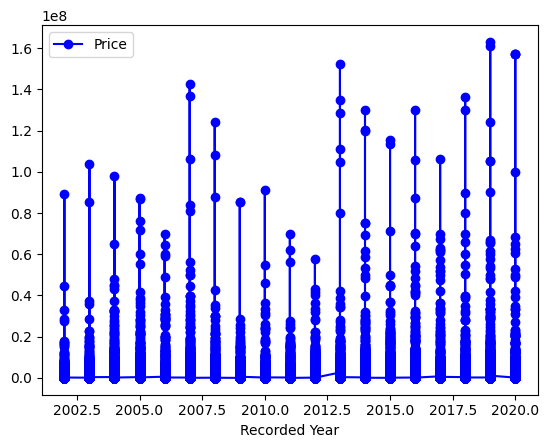

In [131]:
# Gráfico de líneas con la distribución de la variable precio por año.
df_total.plot(x='Recorded Year', y='Price', marker='o', linestyle='-', color='b')

##### Interest Rate / Inflation / Unemployment

In [ ]:
# EL tipo de interés correla positivamente con la inflación y negativamente con el desempleo.
# Por ende, la inflación correla negativamente con el desempleo pero en menor medida.

In [119]:
df_total[["Interest Rate","Inflation"]].corr()

,Interest Rate,Inflation
Interest Rate,1.00000,0.63963
Inflation,0.63963,1.00000


In [120]:
df_total[["Interest Rate","Unemployment"]].corr()

,Interest Rate,Unemployment
Interest Rate,1.000000,-0.561243
Unemployment,-0.561243,1.000000


In [155]:
# El p-value se sitúa muy por encima de 0.05.
# Se rechaza la hipótesis de inpendencia y se confirme la existencia de una relación lineal entre las variables estadísticamente significativa.
pearsonr(df_total["Interest Rate"], df_total["Unemployment"])

PearsonRResult(statistic=-0.5612429210100219, pvalue=0.0)

In [121]:
df_total[["Inflation","Unemployment"]].corr()

,Inflation,Unemployment
Inflation,1.000000,-0.344691
Unemployment,-0.344691,1.000000


In [154]:
# El p-value se sitúa muy por encima de 0.05.
# Se rechaza la hipótesis de inpendencia y se confirme la existencia de una relación lineal entre las variables estadísticamente significativa.
pearsonr(df_total["Inflation"], df_total["Unemployment"])

PearsonRResult(statistic=-0.3446908702112716, pvalue=0.0)

#### Análisis - Resumen anual

##### Creación DF

In [132]:
# Creamos varianbles anuales:
df_yearly_sales=pd.DataFrame(df_total.groupby("Recorded Year")["Date Recorded"].count()) # número de transacciones
df_yearly_price=pd.DataFrame(df_total.groupby("Recorded Year")["Price"].mean().round(0)) # precio medio
df_yearly_price_tot=pd.DataFrame(df_total.groupby("Recorded Year")["Price"].sum()/1000000).round(0) # precio total de las transacciones
df_yearly_intrate=df_total.groupby("Recorded Year")["Interest Rate"].mean().round(4)*100 # tipo de interés medio
df_yearly_inflation=df_total.groupby("Recorded Year")["Inflation"].mean().round(4)*100 # inflación anual
df_yearly_unemployment=df_total.groupby("Recorded Year")["Unemployment"].mean().round(4)*100 # desempleo anual

In [133]:
# Creamos el DF con las nuevas variables.
df_yearly=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_yearly_sales,df_yearly_price_tot,how="left", on="Recorded Year"),df_yearly_price,how="left",on="Recorded Year"),df_yearly_intrate,how="left",on="Recorded Year"),df_yearly_inflation,how="left",on="Recorded Year"),df_yearly_unemployment,how="left",on="Recorded Year")
df_yearly

,Date Recorded,Price_x,Price_y,Interest Rate,Inflation,Unemployment
Recorded Year,,,,,,
2002,57057,14989.0,262704.0,1.68,1.59,5.78
2003,53304,16464.0,308867.0,1.11,2.27,5.99
2004,70254,24105.0,343113.0,1.38,2.68,5.53
2005,75397,29019.0,384885.0,3.20,3.39,5.08
2006,54652,20723.0,379188.0,4.98,3.23,4.62
2007,44414,21372.0,481202.0,5.08,2.85,4.62
2008,32941,13712.0,416258.0,2.03,3.84,5.78
2009,35428,11548.0,325945.0,0.00,-0.36,9.25
2010,38249,13639.0,356576.0,0.00,1.64,9.63


In [134]:
# Renombramos la variable que contiene el volumen de transacciones a Sales Volume.
df_yearly.rename(columns={"Date Recorded":"Sales Volume"},inplace=True)

In [135]:
# Renombramos las variables referentes al precio.
df_yearly.rename(columns={"Price_x":"Sales Value"},inplace=True)
df_yearly.rename(columns={"Price_y":"Avg Price"},inplace=True)

In [136]:
# El año deja de ser el índice para formar una nueva columna (se crea un índice por defecto).
df_yearly.reset_index(inplace=True)

In [137]:
# Renombramos la nueva columna.
df_yearly.rename(columns={"Recorded Year":"Year"},inplace=True)

##### Sales Volume y Value

In [139]:
# La cantidad de inmuebles vendidos y el valor del mercado total están directamente correlacionados (0,87). Evidente. 
df_yearly[["Sales Volume","Sales Value"]].corr()

,Sales Volume,Sales Value
Sales Volume,1.000000,0.872093
Sales Value,0.872093,1.000000


In [140]:
# El p-value se sitúa muy por encima de 0.05.
# Se rechaza la hipótesis de inpendencia y se confirme la existencia de una relación lineal entre las variables estadísticamente significativa.
pearsonr(df_yearly["Sales Volume"], df_yearly["Sales Value"])

PearsonRResult(statistic=0.8720925583150102, pvalue=1.1381984642788957e-06)

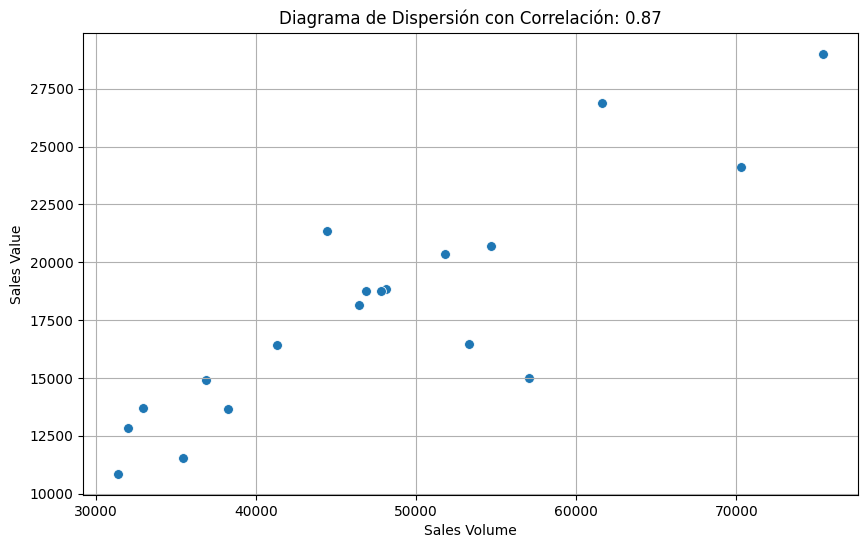

In [141]:
grafico_dispersion_con_correlacion(df_yearly,"Sales Volume","Sales Value", mostrar_correlacion= True)

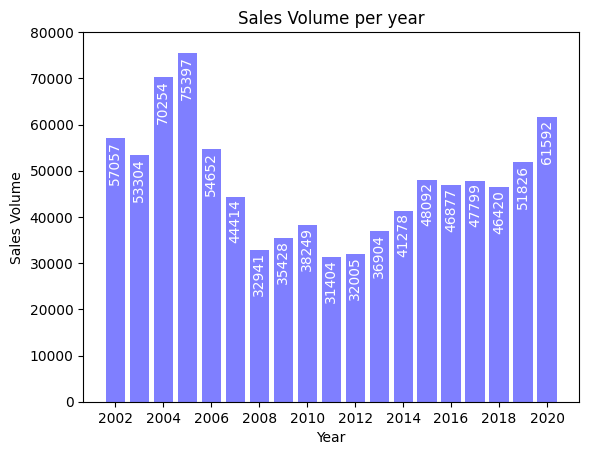

In [143]:
# Gráfico de barras para presentación.
plt.figure()
bars=plt.bar(x= df_yearly["Year"], height= df_yearly["Sales Volume"], color = "blue", alpha = 0.5)
plt.ylim([0,80000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 10000, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")

plt.title("Sales Volume per year")
plt.show()

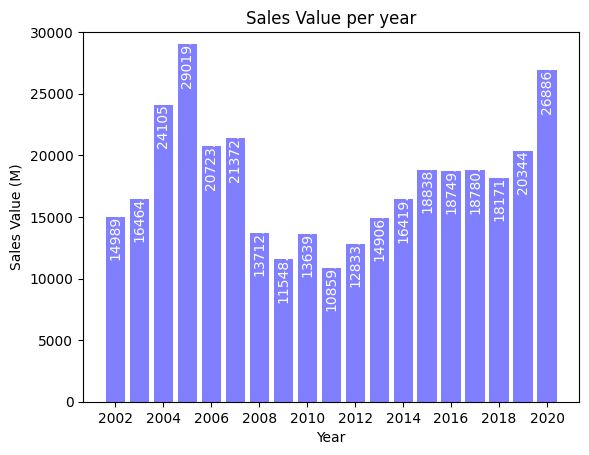

In [144]:
# Gráfico de barras para presentación.
plt.figure()
bars=plt.bar(x= df_yearly["Year"], height= df_yearly["Sales Value"], color = "blue", alpha = 0.5)
plt.ylim([0,30000])
plt.ylabel("Sales Value (M)")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 3500, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")

plt.title("Sales Value per year")
plt.show()

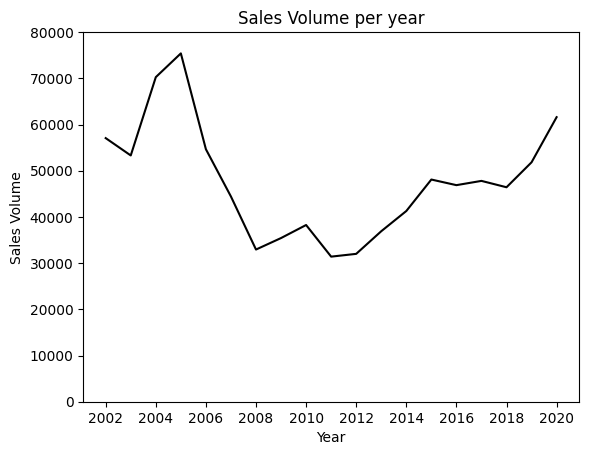

In [145]:
# Gráfico de línea para presentación.
plt.figure()
bars=plt.plot(df_yearly["Year"], df_yearly["Sales Volume"], color="black", label="Sales Volume")
plt.ylim([0,80000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])

plt.title("Sales Volume per year")
plt.show()

Text(0.5, 1.0, 'Sales Value per year')

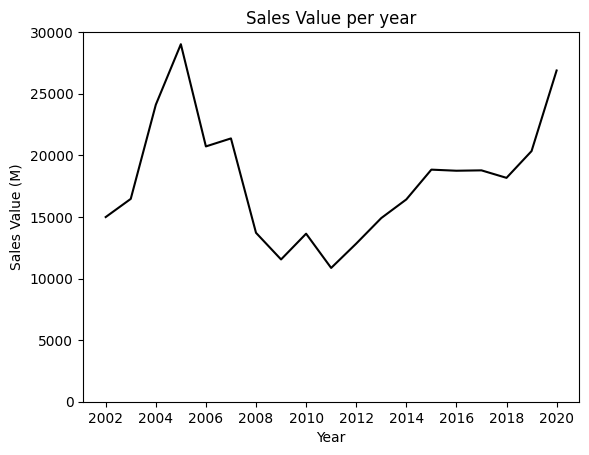

In [146]:
# Gráfico de línea para presentación.
plt.figure()
bars=plt.plot(df_yearly["Year"], df_yearly["Sales Value"], color="black", label="Avg Price")
plt.ylim([0,30000])
plt.ylabel("Sales Value (M)")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])

plt.title("Sales Value per year")

##### Avg Price

Text(0.5, 1.0, 'Avg Price per year')

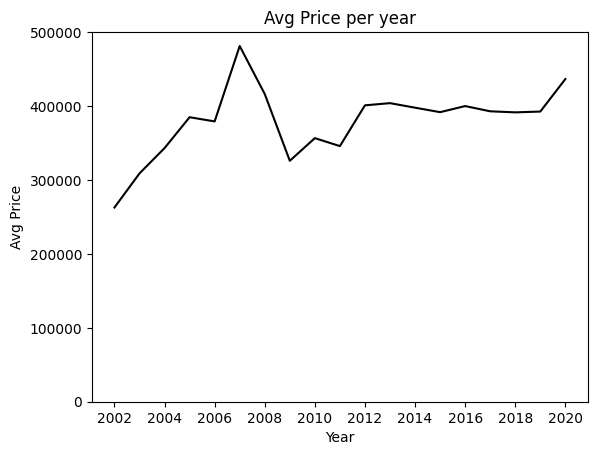

In [147]:
# Gráfico de línea para presentación.
plt.figure()
bars=plt.plot(df_yearly["Year"], df_yearly["Avg Price"], color="black", label="Avg Price")
plt.ylim([0,500000])
plt.ylabel("Avg Price")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])

plt.title("Avg Price per year")

##### Interest Rate y Unemployment

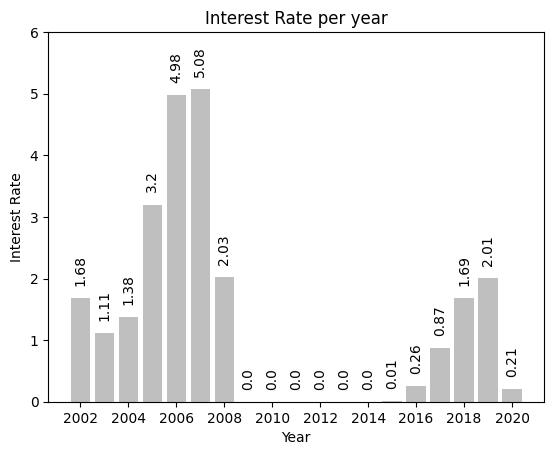

In [148]:
# Gráfico de barras para presentación.
plt.figure()
bars=plt.bar(x= df_yearly["Year"], height= df_yearly["Interest Rate"], color = "gray", alpha = 0.5)
plt.ylim([-0,6])
plt.ylabel("Interest Rate")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bars:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, f"{yval}", ha="center", va="bottom", rotation="vertical")
plt.title("Interest Rate per year")
plt.show()

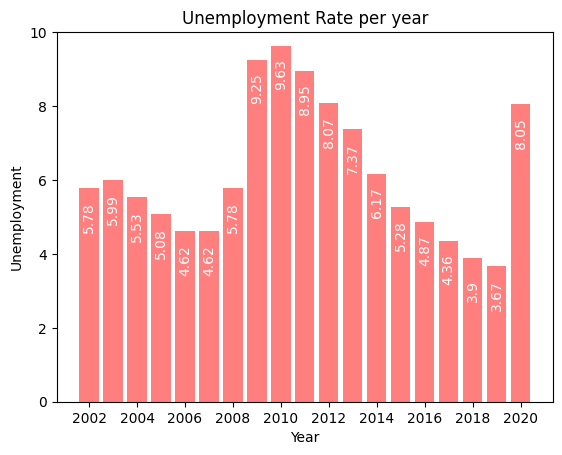

In [161]:
# Gráfico de barras para presentación.
plt.figure()
bars=plt.bar(x= df_yearly["Year"], height= df_yearly["Unemployment"], color = "r", alpha = 0.5)
plt.ylim([0,10])
plt.ylabel("Unemployment")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bars:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 1.2, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")
plt.title("Unemployment per year")
plt.show()

##### Sales Volume / Interest Rate / Unemployment

AttributeError: 'Line2D' object has no attribute 'get_height'

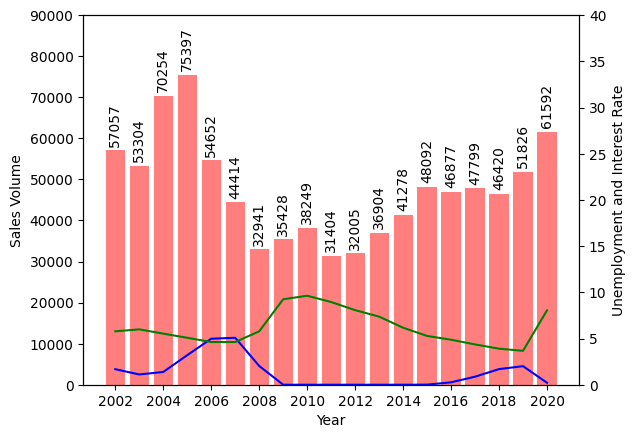

In [165]:
plt.figure()

bar1 = plt.bar(x=df_yearly["Year"], height=df_yearly["Sales Volume"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 90000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f"{yval}", ha="center", va="bottom", rotation="vertical",color="black")

ax2 = plt.twinx()
bar2 = ax2.plot(df_yearly["Year"], df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

bar3 = ax2.plot(df_yearly["Year"], df_yearly["Unemployment"], color="green", label="Unemployment")
for bar in bar3:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 3.5, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")

plt.legend([bar1,bar2,bar3], ["Sales Volume","Interest Rate","Unemployment"], loc='upper center')

plt.title("Comparación de tres series de datos")
plt.show()

C:\Users\albab\AppData\Local\Temp\ipykernel_15580\1399899353.py:22: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([bar1,bar2,bar3], ["Sales Volume","Interest Rate","Unemployment"], loc='upper center')


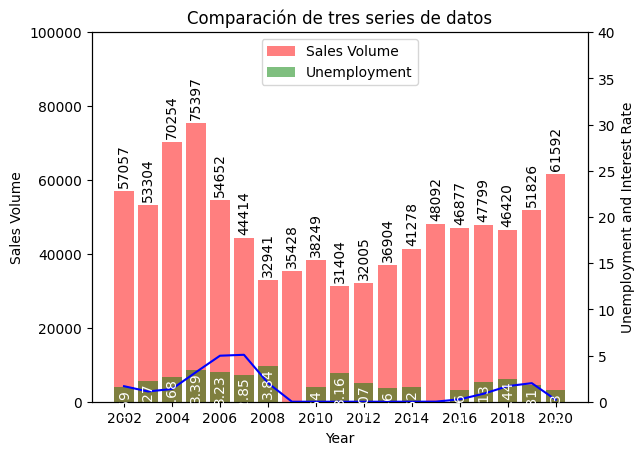

In [162]:
plt.figure()

bar1 = plt.bar(x=df_yearly["Year"], height=df_yearly["Sales Volume"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f"{yval}", ha="center", va="bottom", rotation="vertical",color="black")

ax2 = plt.twinx()
bar2 = ax2.plot(df_yearly["Year"], df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

bar3 = ax2.bar(x=df_yearly["Year"], height=df_yearly["Inflation"], color="g", alpha=0.5, label="Unemployment")
for bar in bar3:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 3.5, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")

plt.legend([bar1,bar2,bar3], ["Sales Volume","Interest Rate","Unemployment"], loc='upper center')

plt.title("Comparación de tres series de datos")
plt.show()

##### Sales Value / Interest Rate / Unemployment

AttributeError: 'Line2D' object has no attribute 'get_height'

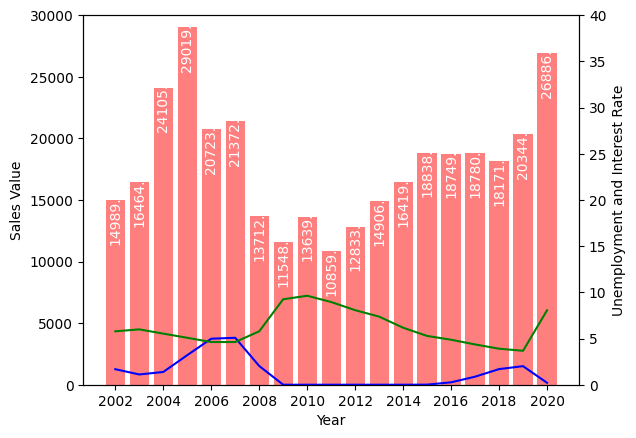

In [182]:
plt.figure()

bar1 = plt.bar(x=df_yearly["Year"], height=df_yearly["Sales Value"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 30000])
plt.ylabel("Sales Value")
plt.xlabel("Year")
plt.xticks(df_yearly["Year"][::2])
for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 3600, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")

ax2 = plt.twinx()
bar2 = ax2.plot(df_yearly["Year"], df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

bar3 = ax2.plot(df_yearly["Year"], df_yearly["Unemployment"], color="green", label="Unemployment")
for bar in bar3:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval +5, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")

plt.legend([bar1,bar2,bar3], ["Sales Value","Interest Rate","Unemployment"], loc='upper center')

plt.title("Comparación de tres series de datos")
plt.show()